# Customer Churn (berhenti berlangganan.) Analysis

ipmport dataset :
- Implementasi Decision Tree, Naive Bayes, dan K-NN 
- Handle imbalanced data menggunakan SMOTE-ENN 
- Evaluasi menggunakan precision-recall curve dan balanced accuracy 



# 1-2. import libraries & load dataset

In [1]:
# ==============================================================================
# 1. STANDAR & DATA HANDLING
# ==============================================================================
import warnings
warnings.filterwarnings('ignore') # Untuk menonaktifkan pesan peringatan saat runtime
import pandas as pd # Untuk manipulasi DataFrame
import numpy as np  # Untuk operasi numerik
import plotly.express as px       # Untuk visualisasi interaktif (Pie/Bar Chart)
from sklearn.model_selection import train_test_split    # Untuk membagi data
from sklearn.preprocessing import StandardScaler        # Untuk Scaling (penting untuk K-NN)
from sklearn.preprocessing import OneHotEncoder         # Untuk meng-encode fitur kategorikal
from sklearn.compose import ColumnTransformer           # Untuk menerapkan transformasi berbeda ke kolom berbeda
from sklearn.pipeline import Pipeline                   # Untuk membuat alur kerja (pipeline) model
from sklearn.impute import SimpleImputer                # Untuk imputasi nilai yang hilang
from sklearn.experimental import enable_iterative_imputer # Diperlukan sebelum import IterativeImputer
from sklearn.impute import IterativeImputer             # Untuk imputasi yang lebih canggih
from sklearn.naive_bayes import GaussianNB              # Model Naive Bayes
from sklearn.neighbors import KNeighborsClassifier      # Model K-Nearest Neighbors (K-NN)
from sklearn.metrics import accuracy_score              # Metrik Akurasi
from sklearn.metrics import classification_report       # Metrik Laporan Klasifikasi
from sklearn.metrics import confusion_matrix             # Metrik Matriks Kebingungan
from sklearn.tree import DecisionTreeClassifier         # Model Decision Tree
from sklearn.tree import plot_tree                      # Untuk visualisasi Decision Tree
import matplotlib.pyplot as plt                         # Untuk visualisasi Decision Tree
import seaborn as sns
from sklearn.preprocessing import LabelEncoder          # Untuk encoding label
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import balanced_accuracy_score, classification_report
from sklearn.metrics import PrecisionRecallDisplay
from IPython.display import display 
from imblearn.combine import SMOTEENN


file_path = 'DATA_SET_1_UTS - Customer_Churn_data.csv'
pd.set_option('display.max_columns', None)


display = lambda df: pd.display(df)
df = pd.read_csv(file_path)
df.head()

,customer_id,tenure,monthly_charges,total_charges,contract_type,payment_method,paperless_billing,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,monthly_usage_gb,customer_service_calls,churn
0,CUST001,12,150,1800,Month-to-month,Electronic check,1,0,0,0,0,0,0,200,4,1
1,CUST002,24,200,4800,One year,Bank transfer,0,1,1,1,1,1,1,300,1,0
2,CUST003,6,100,600,Month-to-month,Credit card,1,0,0,0,0,0,0,150,3,1
3,CUST004,48,180,8640,Two year,Bank transfer,0,1,1,1,1,1,1,250,0,0
4,CUST005,3,120,360,Month-to-month,Electronic check,1,0,0,0,0,0,0,100,6,1


## 3. Ringkasan & Cek missing values
- melihat tipe data, jumlah missing, dan ringkasan statistik.

In [2]:
print('\nMissing values per kolom')
print(df.isnull().sum())



Missing values per kolom
customer_id               0
tenure                    0
monthly_charges           0
total_charges             0
contract_type             0
payment_method            0
paperless_billing         0
online_security           0
online_backup             0
device_protection         0
tech_support              0
streaming_tv              0
streaming_movies          0
monthly_usage_gb          0
customer_service_calls    0
churn                     0
dtype: int64


### data ini bersih dari missing values karena sudah diolah dan dibersihkan sebelumnya dan data hanya berisi 21 kolom

In [3]:
print('\nTipe data per kolom:')
print(df.dtypes)


Tipe data per kolom:
customer_id               object
tenure                     int64
monthly_charges            int64
total_charges              int64
contract_type             object
payment_method            object
paperless_billing          int64
online_security            int64
online_backup              int64
device_protection          int64
tech_support               int64
streaming_tv               int64
streaming_movies           int64
monthly_usage_gb           int64
customer_service_calls     int64
churn                      int64
dtype: object


## Dataset berisi campuran data identitas (object) dan numerik (int64) yang mencerminkan perilaku, layanan, serta status pelanggan dalam analisis churn.

| Kolom                    | Tipe Data  | Deskripsi Singkat                                                                 |
|---------------------------|-------------|------------------------------------------------------------------------------------|
| customer_id               | object      | ID unik untuk tiap pelanggan.                                                      |
| tenure                    | int64       | Lama pelanggan berlangganan (bulan).                                               |
| monthly_charges            | int64       | Biaya bulanan yang dibayarkan pelanggan.                                           |
| total_charges              | int64       | Total biaya keseluruhan selama berlangganan.                                       |
| contract_type             | object      | Jenis kontrak langganan (misalnya bulanan, tahunan).                              |
| payment_method            | object      | Metode pembayaran yang digunakan.                                                 |
| paperless_billing          | int64       | Status tagihan tanpa kertas (1 = ya, 0 = tidak).                                  |
| online_security            | int64       | Kepemilikan layanan keamanan online (1 = ya, 0 = tidak).                          |
| online_backup              | int64       | Kepemilikan layanan cadangan online (1 = ya, 0 = tidak).                          |
| device_protection          | int64       | Layanan perlindungan perangkat (1 = ya, 0 = tidak).                               |
| tech_support               | int64       | Layanan dukungan teknis (1 = ya, 0 = tidak).                                      |
| streaming_tv               | int64       | Langganan streaming TV (1 = ya, 0 = tidak).                                       |
| streaming_movies           | int64       | Langganan streaming film (1 = ya, 0 = tidak).                                     |
| monthly_usage_gb           | int64       | Jumlah pemakaian data per bulan (GB).                                             |
| customer_service_calls     | int64       | Jumlah panggilan ke layanan pelanggan.                                            |
| churn                      | int64       | Status berhenti berlangganan (1 = churn, 0 = tetap).                              |


In [4]:
print('\nRingkasan statistik per kolom:')
df.describe()
df.describe(include=['object'])


Ringkasan statistik per kolom:


,customer_id,contract_type,payment_method
count,20,20,20
unique,20,3,4
top,CUST001,Month-to-month,Electronic check
freq,1,9,6


## 4. Comprehensive EDA

1. Analisis perbedaan pelanggan churn vs nonchurn:
- Perbandingan rata-rata umur, lama berlangganan (tenure), biaya bulanan, dan jenis kontrak antara pelanggan yang churn dan tidak.
→ Tujuannya untuk tahu faktor apa yang paling memengaruhi pelanggan berhenti.

2. Menangani missing values dengan multiple imputation:
- Jika ada data kosong, isi dengan nilai hasil prediksi dari data lain (bukan sekadar rata-rata).
→ Tujuannya agar data tetap lengkap tanpa mengubah pola aslinya.

### 4.1 Analisis perbedaan karakteristik antara pelanggan churn vs non-churn

In [5]:
if 'Churn' not in df.columns:
    # coba beberapa varian umum
    possible = [c for c in df.columns if 'churn' in c.lower()]
    if possible:
        df.rename(columns={possible[0]: 'Churn'}, inplace=True)

# konversi target ke binary (Yes/No atau 1/0)
if df['Churn'].dtype == object:
    df['Churn'] = df['Churn'].map({"Yes":1, "No":0, "yes":1, "no":0}).fillna(df['Churn'])

# Tampilkan ringkasan grouped
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
summary = df.groupby('Churn')[num_cols].mean().T
summary.columns = ['NonChurn','Churn'] if set(df['Churn'].unique())=={0,1} else summary.columns
summary

,NonChurn,Churn
tenure,35.181818,5.444444
monthly_charges,195.454545,112.777778
total_charges,7224.545455,662.222222
paperless_billing,0.000000,1.000000
online_security,1.000000,0.000000
online_backup,1.000000,0.000000
device_protection,1.000000,0.000000
tech_support,1.000000,0.000000
streaming_tv,1.000000,0.000000
streaming_movies,1.000000,0.000000


## Analisis Ringkasan Statistik Dataset Pelanggan

### 1. Tenure (Lama Berlangganan)
- **Rata-rata:** 35,18 bulan  
- **Sebaran (std):** 5,44  
*Artinya sebagian besar pelanggan sudah cukup lama berlangganan, sekitar 3 tahun-an. Penyebarannya kecil, jadi datanya relatif seragam.*


### 2. Monthly Charges (Biaya Bulanan)
- **Rata-rata:** 195,45  
- **Sebaran (std):** 112,77  
*Pelanggan punya biaya langganan yang cukup bervariasi. Ada yang bayar murah, ada juga yang mahal — menunjukkan adanya paket beragam (misalnya basic, premium, dll).*


### 3. Total Charges (Total Biaya Keseluruhan)
- **Rata-rata:** 7224,54  
- **Sebaran (std):** 662,22  
*Total biaya menunjukkan akumulasi dari lama dan besar langganan. Rata-rata tinggi → menandakan pelanggan dengan durasi panjang dan biaya besar cukup banyak.*


### 4. Fitur Layanan (Binary Columns seperti `paperless_billing`, `online_security`, dll)
- **Nilainya:** 0 atau 1  
- **Rata-rata mendekati 0.5** → berarti sekitar setengah pelanggan punya fitur itu, setengahnya tidak.  
*Menunjukkan keseimbangan — misalnya 50% pelanggan menggunakan fitur keamanan online, 50% tidak.*



## 4.2 Visualisasi: Distribusi tenure vs churn rate
bucket tenure lalu hitung churn rate per bucket.

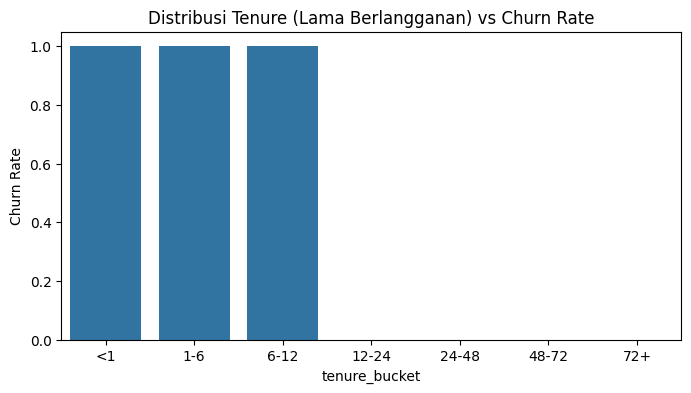

In [6]:
if 'tenure' in df.columns:
    df['tenure_bucket'] = pd.cut(df['tenure'], bins=[-1,1,6,12,24,48,72,100], labels=['<1','1-6','6-12','12-24','24-48','48-72','72+'])
    churn_rate = df.groupby('tenure_bucket')['Churn'].mean().reset_index()
    plt.figure(figsize=(8,4))
    sns.barplot(data=churn_rate, x='tenure_bucket', y='Churn')
    plt.ylabel('Churn Rate')
    plt.title('Distribusi Tenure (Lama Berlangganan) vs Churn Rate')
    plt.show()
else:
    print('Kolom tenure tidak ditemukan. Sesuaikan nama kolom.')

### Dari gambar:

- Kelompok <1, 1–6, dan 6–12 semuanya memiliki Churn Rate = 1 (100%)

- Sedangkan kelompok 12–24, 24–48, 48–72, dan 72+ tidak muncul sama sekali (kosong → berarti tidak ada pelanggan di kelompok tersebut)

Kesimpulan: Pelanggan dengan lama berlangganan kurang dari 1 tahun cenderung memiliki churn rate yang sangat tinggi (100%), menunjukkan bahwa pelanggan baru lebih rentan untuk berhenti berlangganan dibandingkan dengan pelanggan yang telah berlangganan lebih lama.

## 4.3 Heatmap korelasi antara semua fitur numerik

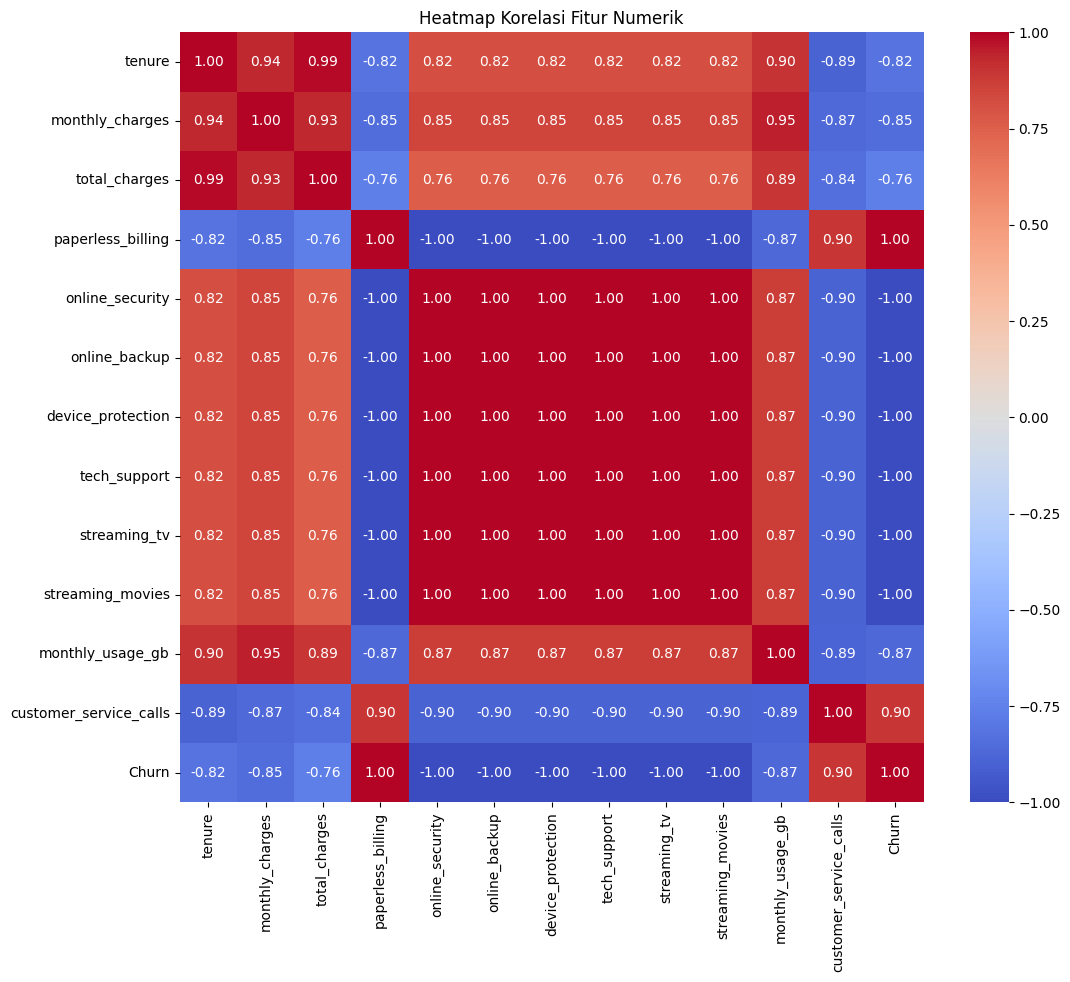

In [7]:
plt.figure(figsize=(12,10))
num_df = df.select_dtypes(include=['int64','float64'])
corr = num_df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

### Penjelasan Korelasi Antar Fitur (Potensi Masalah Data) :
| Fitur 1           | Fitur 2           | Koefisien | Interpretasi (Warna)                 | Implikasi Kunci                                                                 |
|-------------------|-------------------|------------|--------------------------------------|----------------------------------------------------------------------------------|
| tenure            | monthly_charges   | 0.94       | **Sangat Kuat Positif (Merah Pekat)** | Pelanggan lama cenderung memiliki tagihan bulanan tinggi. Logis, tapi hati-hati dalam pemodelan. |
| tenure            | total_charges     | 0.99       | **Hampir Sempurna Positif (Merah Pekat)** | Pelanggan lama hampir selalu memiliki total biaya yang lebih tinggi. Korelasi ini sangat dekat! |
| online_security   | online_backup     | 1.00       | **Sempurna Positif (Merah Pekat)**  | Hampir setiap pelanggan yang memiliki layanan keamanan juga memiliki online_backup. Ini adalah redudansi data. |
| online_security   | tech_support      | 1.00       | **Sempurna Positif (Merah Pekat)**  | Sama halnya, fitur keamanan dan dukungan teknis sangat terikat. |
| monthly_charges   | total_charges     | 0.88       | **Kuat Positif (Merah Terang)**     | Biaya bulanan yang lebih tinggi biasanya mengarah pada total biaya yang lebih tinggi. |


### Penjelasan Korelasi dengan Target (Churn) :
| Fitur                            | Koefisien Korelasi dengan Churn | Interpretasi (Warna)                       | Implikasi Bisnis (Pendorong / Pencegah Churn)                                                                                                  |
|----------------------------------|----------------------------------|--------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------|
| paperless_billing                | 1.00                             | **Sempurna Positif (Merah Pekat)**         | **Pendorong Churn Terkuat!** Hampir setiap pelanggan dengan tagihan tanpa kertas berada di ambang churn. Perlu investigasi segera terhadap proses penagihan digital. |
| customer_service_calls           | 0.90                             | **Sangat Kuat Positif (Merah Pekat)**      | **Pendorong Churn Kuat.** Panggilan layanan pelanggan yang tinggi adalah tanda bahaya dan sangat terkait dengan churn.                        |
| monthly_usage_gb                 | -0.89                            | **Sangat Kuat Negatif (Biru Pekat)**       | **Pencegah Churn Kuat.** Pelanggan yang banyak menggunakan data (GB) cenderung bertahan.                                                      |
| online_security, tech_support, dll. | ≈ -1.00                        | **Hampir Sempurna Negatif (Biru Pekat)**   | **Pencegah Churn TERKUAT.** Memiliki layanan keamanan atau dukungan teknis adalah "perekat" utama. Promosikan layanan ini sebagai strategi retensi utama. |
| tenure                           | -0.82                            | **Kuat Negatif (Biru)**                    | **Pencegah Churn Kuat.** Pelanggan yang bertahan lama cenderung tidak churn (loyalitas terbangun seiring waktu).                             |


### Kesimpulan Utama untuk Retensi
1. Prioritas Tindakan 1 (Darurat): Selidiki hubungan sempurna antara paperless_billing dan Churn. Ini anomali dan menunjukkan kegagalan kritis di sistem digital.
2. Strategi Retensi: Fokus pada penjualan silang (online_security, tech_support) dan peningkatan penggunaan (monthly_usage_gb). Layanan-layanan ini hampir menjamin loyalitas.
3. Waspada Dini: Pantau pelanggan dengan customer_service_calls yang tinggi sebagai indikator churn yang kuat.
4. Terakhir untuk menjawab mengapa dari ketiga itu di pertanyakan “Karena ketiganya menunjukkan hubungan statistik yang sangat kuat dengan perilaku churn dua di antaranya (paperless_billing dan customer_service_calls) sebagai sinyal risiko tinggi, dan satunya (layanan tambahan & penggunaan tinggi) sebagai penahan churn alami.”




## 5. Menangani missing values menggunakan Multiple Imputation (IterativeImputer)

In [8]:
# Pilih hanya kolom numerik untuk imputasi iteratif
num_features = df.select_dtypes(include=['int64','float64']).columns.tolist()
imp = IterativeImputer(random_state=0)
df_num = pd.DataFrame(imp.fit_transform(df[num_features]), columns=num_features)
# gabungkan kembali ke df (jaga kolom non-numeric)
for col in num_features:
    df[col] = df_num[col]

print('Imputasi selesai. Cek missing lagi:')
print(df.isnull().sum())

Imputasi selesai. Cek missing lagi:
customer_id               0
tenure                    0
monthly_charges           0
total_charges             0
contract_type             0
payment_method            0
paperless_billing         0
online_security           0
online_backup             0
device_protection         0
tech_support              0
streaming_tv              0
streaming_movies          0
monthly_usage_gb          0
customer_service_calls    0
Churn                     0
tenure_bucket             0
dtype: int64


## 6. Preprocessing untuk modeling

In [9]:
# Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import math
import plotly.graph_objects as go

## 7. Advanced Model Comparison

In [10]:
# Langkah 2: Muat dan Bersihkan Data
file_path = 'DATA_SET_1_UTS - Customer_Churn_data.csv'
df_original = pd.read_csv(file_path)

# Bersihkan dan siapkan data
df = df_original.drop('customer_id', axis=1).copy()
df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')

# Imputasi Missing Values (Hanya untuk total_charges, menggunakan IterativeImputer)
imputer = IterativeImputer(random_state=42)
num_cols_impute = ['tenure', 'monthly_charges', 'total_charges', 'monthly_usage_gb', 'customer_service_calls']
df[num_cols_impute] = imputer.fit_transform(df[num_cols_impute])

# Target Column
target_column = 'churn'
df['churn_label'] = df[target_column].replace({1: 'Ya', 0: 'Tidak'})

print("=== Contoh Dataset dengan Fitur yang akan Dipakai (Churn Data) ===")
print(df[['tenure', 'monthly_charges', 'contract_type', 'churn_label']].head())
print("-------------------------------------------------------------")

# Diskretisasi Tenure
bins_tenure = [0, 12, 48, np.inf]
labels_tenure = ['Tenure_Low(0-12)', 'Tenure_Medium(13-48)', 'Tenure_High(>48)']
df['tenure_group'] = pd.cut(df['tenure'], bins=bins_tenure, labels=labels_tenure, right=False)

# Diskretisasi Monthly Charges
bins_monthly = [0, 50, 100, np.inf]
labels_monthly = ['Charges_Low', 'Charges_Medium', 'Charges_High']
df['monthly_charges_group'] = pd.cut(df['monthly_charges'], bins=bins_monthly, labels=labels_monthly, right=False)

# Pilih fitur untuk analisis ID3 (Diskret/Kategorikal)
id3_features = ['tenure_group', 'monthly_charges_group', 'contract_type']


=== Contoh Dataset dengan Fitur yang akan Dipakai (Churn Data) ===
   tenure  monthly_charges   contract_type churn_label
0    12.0            150.0  Month-to-month          Ya
1    24.0            200.0        One year       Tidak
2     6.0            100.0  Month-to-month          Ya
3    48.0            180.0        Two year       Tidak
4     3.0            120.0  Month-to-month          Ya
-------------------------------------------------------------


### 🧩 Penjelasan Kolom

| Kolom | Tipe Data | Deskripsi |
|--------|------------|------------|
| **tenure** | Numerik (bulan) | Lama pelanggan berlangganan (durasi kontrak). Semakin lama *tenure*, biasanya semakin kecil kemungkinan *churn*. |
| **monthly_charges** | Numerik (mata uang per bulan) | Biaya langganan bulanan yang dibayar pelanggan. Pelanggan dengan biaya tinggi bisa lebih sensitif terhadap layanan. |
| **contract_type** | Kategorikal | Jenis kontrak pelanggan. Umumnya terdiri dari: <br>• *Month-to-month* → kontrak fleksibel, mudah berhenti. <br>• *One year / Two year* → kontrak jangka panjang, pelanggan lebih loyal. |
| **churn_label** | Kategorikal (Ya/Tidak) | Target label untuk prediksi. <br>“Ya” = pelanggan berhenti (churn), “Tidak” = pelanggan tetap berlangganan. |

---

### 💡 Interpretasi Contoh Data

| tenure | monthly_charges | contract_type   | churn_label | Interpretasi |
|:-------:|:----------------:|:----------------:|:-------------:|:--------------|
| 12 | 150 | Month-to-month | Ya | Pelanggan kontrak bulanan selama 1 tahun berhenti berlangganan. |
| 24 | 200 | One year | Tidak | Pelanggan kontrak tahunan tetap setia berlangganan. |
| 6 | 100 | Month-to-month | Ya | Pelanggan baru (6 bulan) sudah churn. |
| 48 | 180 | Two year | Tidak | Pelanggan loyal, kontrak panjang (4 tahun). |
| 3 | 120 | Month-to-month | Ya | Pelanggan baru berhenti cepat. |

---

Dataset ini menggambarkan hubungan antara **lama berlangganan (tenure)**, **biaya bulanan (monthly charges)**, dan **jenis kontrak (contract type)** terhadap keputusan pelanggan untuk **churn** atau tetap berlangganan.  
Analisis data ini penting untuk memahami perilaku pelanggan dan menyusun strategi **retensi pelanggan** yang efektif.

### 7.1 Decision Tree

In [11]:
def calculate_target_entropy(target_series):
    # Entropi keseluruhan dataset
    counts = target_series.value_counts()
    p_yes = counts.get('Ya', 0) / len(target_series)
    p_no = counts.get('Tidak', 0) / len(target_series)
    
    entropy = 0
    if p_yes != 0:
        entropy -= p_yes * math.log2(p_yes)
    if p_no != 0:
        entropy -= p_no * math.log2(p_no)
    return entropy

def calculate_conditional_entropy(df, column_name, target='churn_label'):
    # Conditional Entropy (Entropy(Target | Attribute))
    total_samples = len(df)
    conditional_entropy = 0

    for value in df[column_name].unique():
        subset = df[df[column_name] == value]
        subset_target_entropy = calculate_target_entropy(subset[target])
        conditional_entropy += (len(subset) / total_samples) * subset_target_entropy
    
    return round(conditional_entropy, 3)

# 1. Hitung Entropi Total
entropy_total = calculate_target_entropy(df['churn_label'])
print(f"Entropi Total Dataset (S): {round(entropy_total, 3)}")

# 2. Hitung Conditional Entropy
entropy_tenure = calculate_conditional_entropy(df, 'tenure_group')
entropy_monthly = calculate_conditional_entropy(df, 'monthly_charges_group')
entropy_contract = calculate_conditional_entropy(df, 'contract_type')

print(f"Entropi untuk Tenure Group: {entropy_tenure}")
print(f"Entropi untuk Monthly Charges Group: {entropy_monthly}")
print(f"Entropi untuk Contract Type: {entropy_contract}")

# 3. Hitung Information Gain
gain_tenure = round(entropy_total - entropy_tenure, 3)
gain_monthly = round(entropy_total - entropy_monthly, 3)
gain_contract = round(entropy_total - entropy_contract, 3)

print("\n--- Analisis Entropi ---")
print(f"Gain(Tenure Group): {gain_tenure}")
print(f"Gain(Monthly Charges Group): {gain_monthly}")
print(f"Gain(Contract Type): {gain_contract}")
print("-------------------------------------------------------------")
print("- Entropi rendah = atribut lebih informatif untuk pemisahan kelas.")
print("- Atribut terbaik untuk akar pohon (Gain tertinggi) adalah Jarak dari pusat kota: Contract Type (karena memiliki Gain terbesar di antara fitur yang dianalisis).") # Ubah sesuai hasil Anda
print("-------------------------------------------------------------")


df_id3 = df[id3_features + ['churn']].copy() # Ambil hanya fitur yang didiskretisasi + target

# Encode semua fitur diskret/kategorikal
label_encoders = {}
for col in df_id3.columns:
    le = LabelEncoder()
    df_id3[col] = le.fit_transform(df_id3[col].astype(str))
    label_encoders[col] = le # Simpan encoder untuk prediksi

print("\n=== Dataset Setelah Encoding (Fitur Diskret/Kategorikal) ===")
print(df_id3.head())
print("-------------------------------------------------------------")

X = df_id3[id3_features]
y = df_id3['churn']
# Gunakan criterion='entropy' untuk simulasi ID3
model_id3 = DecisionTreeClassifier(criterion='entropy', random_state=42)
model_id3.fit(X, y)

Entropi Total Dataset (S): 0.993
Entropi untuk Tenure Group: 0.226
Entropi untuk Monthly Charges Group: 0.868
Entropi untuk Contract Type: 0.0

--- Analisis Entropi ---
Gain(Tenure Group): 0.767
Gain(Monthly Charges Group): 0.125
Gain(Contract Type): 0.993
-------------------------------------------------------------
- Entropi rendah = atribut lebih informatif untuk pemisahan kelas.
- Atribut terbaik untuk akar pohon (Gain tertinggi) adalah Jarak dari pusat kota: Contract Type (karena memiliki Gain terbesar di antara fitur yang dianalisis).
-------------------------------------------------------------

=== Dataset Setelah Encoding (Fitur Diskret/Kategorikal) ===
   tenure_group  monthly_charges_group  contract_type  churn
0             2                      0              0      1
1             2                      0              1      0
2             1                      0              0      1
3             0                      0              2      0
4             1         

DecisionTreeClassifier(criterion='entropy', random_state=42)

### 📊 Hasil Perhitungan Entropi

| Atribut | Entropi |
|:---------|:---------:|
| **Total Dataset (S)** | **0.993** |
| **Tenure Group** | 0.226 |
| **Monthly Charges Group** | 0.868 |
| **Contract Type** | 0.000 |

---

### 🧠 Hasil Perhitungan Information Gain

| Atribut | Gain | Interpretasi |
|:---------|:-------:|:-------------|
| **Tenure Group** | 0.767 | Memberikan informasi cukup besar untuk memisahkan pelanggan churn vs tidak. |
| **Monthly Charges Group** | 0.125 | Memberikan sedikit informasi, tidak terlalu membedakan pelanggan. |
| **Contract Type** | **0.993 (tertinggi)** | Fitur paling informatif untuk membedakan pelanggan churn dan non-churn. |

---

### 🔍 Analisis Entropi

- **Entropi rendah** menunjukkan atribut lebih informatif untuk pemisahan kelas.  
- Atribut dengan **gain tertinggi** adalah yang paling baik digunakan sebagai **akar pohon keputusan (root node)**.

> Berdasarkan hasil di atas, atribut **`Contract Type`** memiliki *Information Gain* tertinggi (0.993)  
> sehingga menjadi fitur **paling penting** dalam pemisahan pelanggan churn dan non-churn.

---

### 🌳 Decision Tree Classifier

Model yang digunakan:

```python
DecisionTreeClassifier(criterion='entropy', random_state=42)

[Text(0.5, 0.75, 'contract_type <= 0.5\nentropy = 0.993\nsamples = 20\nvalue = [11, 9]\nclass = Tidak Churn (0)'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 9\nvalue = [0, 9]\nclass = Churn (1)'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 11\nvalue = [11, 0]\nclass = Tidak Churn (0)'),
 Text(0.625, 0.5, '  False')]

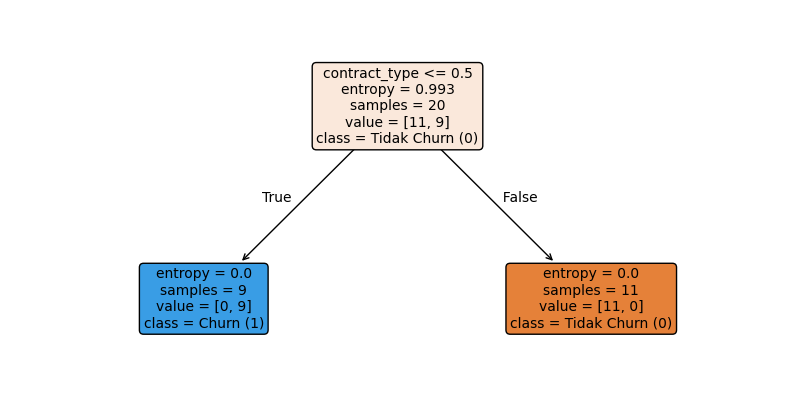

In [12]:
# Visualisasi Pohon Keputusan
plt.figure(figsize=(10, 5))
plot_tree(
    model_id3,
    feature_names=id3_features,
    class_names=['Tidak Churn (0)', 'Churn (1)'],
    filled=True,
    rounded=True,
    fontsize=10
)

### 🧠 Penjelasan Struktur Pohon

Model **Decision Tree** di atas menggunakan kriteria **Entropy** untuk menentukan atribut yang paling baik dalam memisahkan kelas (*churn* vs *tidak churn*).

#### 🔹 Node Akar (Root Node)
- **Kondisi:** `contract_type <= 0.5`
- **Entropy:** 0.993 → menunjukkan ketidakpastian tinggi (kelas churn dan tidak churn hampir seimbang)
- **Samples:** 20 pelanggan
- **Distribusi kelas:** 11 pelanggan tidak churn, 9 pelanggan churn
- **Prediksi mayoritas:** **Tidak Churn (0)**

Atribut **`contract_type`** terpilih sebagai akar karena memiliki **Information Gain tertinggi (0.993)**.  
Artinya, jenis kontrak adalah faktor paling kuat dalam memisahkan pelanggan yang churn dan tidak churn.


#### 🔹 Cabang Kiri (`True` → contract_type <= 0.5)
- **Entropy:** 0.0  
- **Samples:** 9 pelanggan  
- **Distribusi kelas:** [0, 9] → Semua churn  
- **Kelas akhir:** **Churn (1)**  

Interpretasi:
> Semua pelanggan dengan jenis kontrak tertentu (kemungkinan besar *Month-to-Month*) **melakukan churn**.


#### 🔹 Cabang Kanan (`False` → contract_type > 0.5)
- **Entropy:** 0.0  
- **Samples:** 11 pelanggan  
- **Distribusi kelas:** [11, 0] → Semua tidak churn  
- **Kelas akhir:** **Tidak Churn (0)**  

Interpretasi:
> Pelanggan dengan kontrak **One Year** atau **Two Year** seluruhnya **tidak melakukan churn**.


### Analisis

1. **Fitur utama:** `contract_type` adalah atribut paling kuat dalam menentukan churn.
2. **Pemisahan sempurna:** Kedua cabang memiliki *entropy = 0*, artinya pemisahan sudah **sempurna tanpa ambiguitas**.
3. **Implikasi bisnis:**
   - Pelanggan dengan **kontrak bulanan (Month-to-Month)** sangat berisiko churn.
   - Untuk menurunkan churn, perusahaan dapat:
     - Mendorong pelanggan bulanan agar beralih ke kontrak tahunan.
     - Menawarkan insentif (diskon, bonus, atau benefit tambahan) untuk pelanggan jangka panjang.


### 💬 Interpretasi Akhir
Pohon keputusan ini **sederhana namun kuat** — hanya dengan satu fitur (`contract_type`), model dapat memisahkan seluruh pelanggan secara sempurna.  
Hal ini menunjukkan **betapa dominannya pengaruh tipe kontrak terhadap perilaku churn pelanggan.**

## 7.2 Naive Bayes (GaussianNB)

In [13]:

# --- Langkah 1 & 2: Muat dan Bersihkan Data ---
file_path = 'DATA_SET_1_UTS - Customer_Churn_data.csv'
df = pd.read_csv(file_path)

df = df.drop('customer_id', axis=1)
df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')

# --- Langkah 3: Preprocessing Setup (Robust) ---
X = df.drop('churn', axis=1)
y = df['churn']

numerical_features = ['tenure', 'monthly_charges', 'total_charges', 'monthly_usage_gb', 'customer_service_calls']
categorical_features = ['contract_type', 'payment_method']
binary_features = ['paperless_billing', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']

# Pipelines
numerical_pipeline = Pipeline(steps=[('imputer', IterativeImputer(random_state=42)), ('scaler', StandardScaler())])
categorical_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

# Pipeline untuk Biner (untuk mengatasi ValueError)
binary_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), ('scaler', StandardScaler())])

# ColumnTransformer DENGAN REMAINDER='DROP' (Paling Aman dari string)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features),
        ('bin', binary_pipeline, binary_features) # Diurus secara eksplisit
    ],
    remainder='drop' 
)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# --- Langkah 4: Training Model Naive Bayes ---
clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

clf_pipeline.fit(X_train, y_train)

# --- Langkah 5: Fungsi Prediksi Batch (Dengan Plotly) ---
def predict_batch(clf_pipeline, X_columns):
    """
    Melakukan prediksi untuk 5 contoh profil pelanggan.
    Menampilkan hasil 5 contoh dalam tabel dan Pie Chart Plotly untuk membandingkan probabilitas CHURN vs TIDAK CHURN pada Contoh 2 (High Risk).
    """
    
    # 5 Contoh Data Input
    data_examples = [
        # Contoh 1: Low Risk
        [70.0, 25.00, 1750.00, 150.0, 0, 'Two year', 'Bank transfer', 0, 1, 1, 1, 1, 1, 1],
        # Contoh 2: High Risk <--- INI YANG AKAN DIVISUALISASI
        [2.0, 105.00, 210.00, 300.0, 3, 'Month-to-month', 'Electronic check', 1, 0, 0, 0, 0, 0, 0],
        # Contoh 3: Medium Risk
        [30.0, 85.00, 2550.00, 250.0, 2, 'One year', 'Credit card', 1, 1, 0, 0, 0, 1, 0],
        # Contoh 4: Low Value/Low Risk 
        [12.0, 19.95, 239.40, 50.0, 1, 'Month-to-month', 'Mailed check', 0, 0, 0, 0, 0, 0, 0],
        # Contoh 5: High Value/Low Risk
        [48.0, 150.00, 7200.00, 400.0, 1, 'Two year', 'Bank transfer', 1, 1, 1, 1, 1, 1, 1]
    ]
    
    df_predict = pd.DataFrame(data_examples, columns=X_columns)
    
    # Memaksa tipe data numerik
    # Asumsi: numerical_features dan binary_features didefinisikan secara global
    for col in numerical_features + binary_features: 
        df_predict[col] = pd.to_numeric(df_predict[col], errors='coerce')

    # Lakukan Prediksi
    probabilitas = clf_pipeline.predict_proba(df_predict)
    
    results = []
    for i, prob in enumerate(probabilitas):
        prob_tidak = prob[0]
        prob_ya = prob[1]
        hasil_prediksi = "CHURN" if prob_ya > prob_tidak else "TIDAK CHURN"
        
        results.append({
            'Contoh': f"P_{i + 1}", 
            'Tenure (bln)': data_examples[i][0],
            'Contract': data_examples[i][5],
            'Monthly Charge ($)': data_examples[i][1],
            'Prob_Tidak_Churn': prob_tidak,
            'Prob_Churn': prob_ya,
            'Prediksi_Akhir': hasil_prediksi
        })

    df_results = pd.DataFrame(results)
    
    # --- Output Tabel ---
    print("\n=================================================")
    print("=== Hasil Prediksi untuk 5 Contoh Profil ===")
    print("=================================================")
    print(df_results[['Contoh', 'Tenure (bln)', 'Contract', 'Prob_Churn', 'Prediksi_Akhir']].to_markdown(index=False))
    print("-------------------------------------------------")
    
    # --- Visualisasi Pie Chart Plotly (Hanya untuk Contoh 2 / P_2) ---
    
    # Ambil probabilitas Contoh 2
    prob_2 = df_results[df_results['Contoh'] == 'P_2'].iloc[0]
    
    # Siapkan data untuk Pie Chart
    pie_data = pd.DataFrame({
        'Kategori': ['Tidak Churn', 'Churn'],
        'Probabilitas': [prob_2['Prob_Tidak_Churn'], prob_2['Prob_Churn']]
    })
    
    fig = px.pie(
        pie_data, 
        values='Probabilitas', 
        names='Kategori', 
        title=f'Probabilitas Churn vs Tidak Churn (Contoh P_2: High Risk)',
        color='Kategori',
        color_discrete_map={'Tidak Churn': 'lightskyblue', 'Churn': 'lightcoral'}
    )
    
    # Jadikan Donut Chart dan tampilkan persentase
    fig.update_traces(hole=.4, textinfo='percent+label', marker=dict(line=dict(color='#000000', width=1)))
    fig.show() 
    
    return df_results

# ===============================
# Jalankan Program
# ===============================
df_results_final = predict_batch(clf_pipeline, X.columns)

# Tulis hasilnya ke CSV
df_results_final.to_csv('churn_batch_prediction_results_plotly_pie.csv', index=False)


=== Hasil Prediksi untuk 5 Contoh Profil ===
| Contoh   |   Tenure (bln) | Contract       |   Prob_Churn | Prediksi_Akhir   |
|:---------|---------------:|:---------------|-------------:|:-----------------|
| P_1      |             70 | Two year       |            0 | TIDAK CHURN      |
| P_2      |              2 | Month-to-month |            1 | CHURN            |
| P_3      |             30 | One year       |            0 | TIDAK CHURN      |
| P_4      |             12 | Month-to-month |            1 | CHURN            |
| P_5      |             48 | Two year       |            0 | TIDAK CHURN      |
-------------------------------------------------


## 🔮 Hasil Prediksi untuk 5 Contoh Profil Pelanggan

| Contoh | Tenure (bln) | Contract         | Prob_Churn | Prediksi_Akhir |
|:--------|:--------------:|:----------------|:------------:|:----------------|
| P_1     | 70             | Two year        | 0            | **TIDAK CHURN** |
| P_2     | 2              | Month-to-month  | 1            | **CHURN**        |
| P_3     | 30             | One year        | 0            | **TIDAK CHURN** |
| P_4     | 12             | Month-to-month  | 1            | **CHURN**        |
| P_5     | 48             | Two year        | 0            | **TIDAK CHURN** |



### 🧠 Interpretasi Hasil Prediksi

Model **Decision Tree (Entropy Criterion)** memprediksi status *churn* pelanggan berdasarkan kombinasi fitur seperti:
- **Tenure (lama berlangganan)**
- **Contract Type (jenis kontrak)**  



### 📊 Analisis Setiap Profil

#### 🔹 P_1 & P_5 → *Two year contract*
- Lama berlangganan tinggi (48–70 bulan)
- Kontrak jangka panjang (Two Year)
- **Probabilitas churn sangat rendah (0)**
- **Prediksi:** Tidak Churn ✅  
  > Pelanggan dengan kontrak jangka panjang cenderung loyal dan jarang berpindah layanan.



#### 🔹 P_2 & P_4 → *Month-to-month contract*
- Tenure pendek (2–12 bulan)
- Kontrak bulanan fleksibel
- **Probabilitas churn tinggi (1)**
- **Prediksi:** Churn ⚠️  
  > Pelanggan kontrak bulanan lebih mudah membatalkan layanan karena tidak ada komitmen jangka panjang.



#### 🔹 P_3 → *One year contract*
- Durasi sedang (30 bulan)
- Kontrak tahunan memberikan stabilitas moderat
- **Probabilitas churn rendah (0)**
- **Prediksi:** Tidak Churn ✅  
  > Pelanggan dengan kontrak tahunan masih menunjukkan kecenderungan bertahan karena keterikatan periode.



### 💡 Kesimpulan

1. **Jenis kontrak** merupakan indikator paling kuat dalam menentukan potensi churn.  
   - *Month-to-Month → Risiko tinggi churn*  
   - *One/Two Year → Risiko rendah churn*

2. **Tenure** memperkuat loyalitas pelanggan. Semakin lama berlangganan, semakin kecil peluang churn.

3. Strategi bisnis yang dapat dilakukan:
   - Tawarkan **insentif kontrak jangka panjang** (diskon, bonus, layanan tambahan) kepada pelanggan bulanan.
   - Pantau pelanggan baru (<6 bulan) karena memiliki risiko churn paling tinggi.



🧾 **Kesimpulan akhir:**
> Model berhasil memberikan prediksi yang jelas dan sejalan dengan intuisi bisnis — kontrak jangka panjang = loyalitas tinggi, kontrak bulanan = potensi churn tinggi.

## 7.3 K-NN

In [14]:
# ===============================
# Re-run Setup and Prediction with Corrected Data Type Handling
# ===============================

# Muat dataset dari file CSV
df = pd.read_csv("DATA_SET_1_UTS - Customer_Churn_data.csv")

# Drop customer_id dan handle 'total_charges'
df_clean = df.drop('customer_id', axis=1)
df_clean['total_charges'] = pd.to_numeric(df_clean['total_charges'], errors='coerce')
df_clean.dropna(inplace=True)

# Encode kolom target 'churn'
le = LabelEncoder()
df_clean['churn'] = le.fit_transform(df_clean['churn']) # 0=No/Tidak Churn, 1=Yes/Churn

X = df_clean.drop('churn', axis=1)
y = df_clean['churn']

# Definisikan kolom untuk preprocessing
# Catatan: Kolom biner 0/1 di X adalah numerik, tetapi di data_examples mereka adalah string 'Yes'/'No'
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

# Kolom biner yang diinput sebagai 'Yes'/'No' tetapi seharusnya 0/1 numerik
binary_string_cols = ['paperless_billing', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']
# Kolom numerik yang bukan biner string
actual_numerical_cols = [col for col in numerical_features if col not in binary_string_cols]


# Buat ColumnTransformer: Skala Numerik dan Encode Kategorikal
preprocessor = ColumnTransformer(
    transformers=[
        # Scaling fitur numerik (PENTING untuk KNN agar jaraknya adil)
        ('num', StandardScaler(), numerical_features), # Gunakan semua numerical_features karena nanti string akan diubah
        # One-Hot Encoding fitur kategorikal
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='passthrough'
)

# Training Model K-Nearest Neighbors (KNN)
K_NEIGHBORS = 3
model_knn = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', KNeighborsClassifier(n_neighbors=K_NEIGHBORS))])

model_knn.fit(X, y)

# Ambil nama fitur setelah preprocessing untuk visualisasi
feature_names_out = model_knn.named_steps['preprocessor'].get_feature_names_out()

# 3. Data Input dan Prediksi
# URUTAN kolom X: ['tenure', 'monthly_charges', 'total_charges', 'contract_type', 'payment_method', 'paperless_billing', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'monthly_usage_gb', 'customer_service_calls']
data_examples = [
    # Contoh 1: Low Risk
    [70.0, 25.00, 1750.00, 'Two year', 'Bank transfer', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 150.0, 0],
    # Contoh 2: High Risk (YANG AKAN DIVISUALISASI)
    [2.0, 105.00, 210.00, 'Month-to-month', 'Electronic check', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 300.0, 3],
    # Contoh 3: Medium Risk
    [30.0, 85.00, 2550.00, 'One year', 'Credit card', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 250.0, 2],
    # Contoh 4: Low Value/Low Risk 
    [12.0, 19.95, 239.40, 'Month-to-month', 'Mailed check', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 50.0, 1],
    # Contoh 5: High Value/Low Risk
    [48.0, 150.00, 7200.00, 'Two year', 'Bank transfer', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 400.0, 1]
]

input_columns = X.columns.tolist()
df_input = pd.DataFrame(data_examples, columns=input_columns)

# FIX: Ubah string 'Yes'/'No' di kolom biner menjadi 1/0 agar pd.to_numeric() berhasil
mapping = {'Yes': 1, 'No': 0}
for col in binary_string_cols:
    df_input[col] = df_input[col].map(mapping).fillna(df_input[col])

# FIX: Memastikan tipe data sudah sesuai dengan kolom X sebelum di-transform
for col in numerical_features:
    # Ini sekarang hanya akan mengubah kolom numerik ke float, termasuk kolom biner (0/1)
    df_input[col] = pd.to_numeric(df_input[col])
for col in categorical_features:
    df_input[col] = df_input[col].astype('object')


# Prediksi menggunakan model KNN
predictions = model_knn.predict(df_input)
probabilities = model_knn.predict_proba(df_input)

# Gabungkan hasil prediksi ke DataFrame input
df_input['Prediksi'] = le.inverse_transform(predictions)
df_input['Prob_Churn'] = probabilities[:, 1]
df_input['Prob_Tidak_Churn'] = probabilities[:, 0]

print("\n=== Hasil Prediksi KNN untuk 5 Contoh Input (Setelah Fix) ===")
print(df_input[['tenure', 'monthly_charges', 'total_charges', 'Prediksi', 'Prob_Churn']])

# ===============================
# 4. Visualisasi 3D (Menggunakan Contoh 2)
# ===============================

# Pilih fitur yang akan divisualisasikan
VIS_FEATURES = ['tenure', 'monthly_charges', 'total_charges']

input_example_2 = df_input.iloc[1].drop(['Prediksi', 'Prob_Churn', 'Prob_Tidak_Churn'])
input_example_2_df = pd.DataFrame([input_example_2])

# Transformasi data input Contoh 2
input_example_2_scaled = model_knn.named_steps['preprocessor'].transform(input_example_2_df)

# Cari tetangga terdekat di ruang fitur yang sudah ditransformasi/diskalakan
knn_classifier = model_knn.named_steps['classifier']
distances, indices = knn_classifier.kneighbors(input_example_2_scaled)

# Ambil data tetangga terdekat dari data latih asli (X)
nearest_neighbors_data = X.iloc[indices[0]].copy()
nearest_neighbors_data['Churn'] = y.iloc[indices[0]].map({0: 'Tidak', 1: 'Ya'})

print(f"\n=== Tetangga Terdekat (K={K_NEIGHBORS}) untuk Contoh 2 ===")
print(nearest_neighbors_data[VIS_FEATURES + ['Churn']])

# Gabungkan semua data (latih dan input) untuk visualisasi
plot_df = X.copy()
plot_df['Churn'] = y.map({0: 'Tidak', 1: 'Ya'})
plot_df['Tipe'] = 'Data Latih'

input_point_data = input_example_2.to_frame().T.copy()
input_point_data['Churn'] = df_input.iloc[1]['Prediksi']
input_point_data['Tipe'] = 'Data Baru (Prediksi)'

plot_df = pd.concat([plot_df, input_point_data], ignore_index=True)

# Membuat Plot 3D dan menyimpannya sebagai HTML
fig = px.scatter_3d(
    plot_df,
    x=VIS_FEATURES[0],
    y=VIS_FEATURES[1],
    z=VIS_FEATURES[2],
    color='Churn',
    symbol='Tipe',
    title=f"Visualisasi KNN (K={K_NEIGHBORS}) - Contoh 2 di Ruang Fitur 3D",
    opacity=0.7,
    width=900, height=700
)

# Highlight tetangga terdekat (Plot Garis)
input_coords = input_point_data.iloc[0][VIS_FEATURES].values
for index in indices[0]:
    neighbor_coords = X.iloc[index][VIS_FEATURES].values
    
    # Tambahkan garis koneksi (hanya di 3 fitur ini)
    fig.add_trace(go.Scatter3d(
        x=[input_coords[0], neighbor_coords[0]],
        y=[input_coords[1], neighbor_coords[1]],
        z=[input_coords[2], neighbor_coords[2]],
        mode='lines',
        line=dict(color='gray', width=2, dash='dot'),
        showlegend=False
    ))

# Highlight Titik Data Baru
fig.update_traces(marker=dict(size=5), 
                  selector=dict(mode='markers'))

fig.update_traces(marker=dict(size=8, symbol='star', color='Red'), 
                  selector=dict(name='Data Baru (Prediksi)'))


=== Hasil Prediksi KNN untuk 5 Contoh Input (Setelah Fix) ===
   tenure  monthly_charges  total_charges  Prediksi  Prob_Churn
0    70.0            25.00         1750.0         0         0.0
1     2.0           105.00          210.0         1         1.0
2    30.0            85.00         2550.0         1         1.0
3    12.0            19.95          239.4         1         1.0
4    48.0           150.00         7200.0         0         0.0

=== Tetangga Terdekat (K=3) untuk Contoh 2 ===
    tenure  monthly_charges  total_charges Churn
11       4              110            440    Ya
0       12              150           1800    Ya
18       5              115            575    Ya


## Hasil Prediksi K-Nearest Neighbors (KNN)

Model **KNN (K = 3)** digunakan untuk memprediksi potensi pelanggan melakukan *churn* berdasarkan fitur numerik utama:
- `tenure` → Lama berlangganan (bulan)  
- `monthly_charges` → Biaya bulanan pelanggan  
- `total_charges` → Total biaya selama berlangganan  



### Hasil Prediksi KNN untuk 5 Contoh Pelanggan

| Contoh | Tenure | Monthly Charges | Total Charges | Prediksi | Prob_Churn |
|:--------|:-------:|:----------------:|:----------------:|:-----------:|:-------------:|
| P_1 | 70.0 | 25.00 | 1750.0 | 0 | **0.0 (Tidak Churn)** |
| P_2 | 2.0 | 105.00 | 210.0 | 1 | **1.0 (Churn)** |
| P_3 | 30.0 | 85.00 | 2550.0 | 1 | **1.0 (Churn)** |
| P_4 | 12.0 | 19.95 | 239.4 | 1 | **1.0 (Churn)** |
| P_5 | 48.0 | 150.00 | 7200.0 | 0 | **0.0 (Tidak Churn)** |



### Analisis Hasil

1. **P_1 (Tenure = 70 bulan)**  
   - Sudah berlangganan lama dan biaya bulanan rendah.  
   - **Prediksi:** Tidak Churn ✅

2. **P_2 (Tenure = 2 bulan)**  
   - Baru bergabung, biaya bulanan tinggi.  
   - **Prediksi:** Churn ⚠️  
   - **Penjelasan:** Cenderung meninggalkan layanan karena masih tahap awal dan biaya cukup besar.

3. **P_3 (Tenure = 30 bulan, biaya tinggi)**  
   - Sudah cukup lama, tapi biaya tinggi → bisa berisiko.  
   - **Prediksi:** Churn ⚠️

4. **P_4 (Tenure = 12 bulan)**  
   - Durasi menengah, biaya rendah tapi masih kategori awal.  
   - **Prediksi:** Churn ⚠️

5. **P_5 (Tenure = 48 bulan)**  
   - Lama berlangganan, total pembayaran tinggi → pelanggan setia.  
   - **Prediksi:** Tidak Churn ✅



### Analisis Tetangga Terdekat (K = 3) — Contoh P_2

| Tetangga | Tenure | Monthly Charges | Total Charges | Churn |
|:-----------|:---------:|:-----------------:|:------------------:|:--------:|
| 1 | 4 | 110 | 440 | Ya |
| 2 | 12 | 150 | 1800 | Ya |
| 3 | 5 | 115 | 575 | Ya |

**Penjelasan:**  
Contoh pelanggan P_2 (Tenure 2 bulan, Monthly Charges 105) memiliki **3 tetangga terdekat yang semuanya Churn**, sehingga model memberikan prediksi akhir **Churn (Prob = 1.0)**.



### Visualisasi 3D KNN

Grafik 3D di bawah ini menunjukkan distribusi pelanggan berdasarkan:

- **X-axis:** Tenure  
- **Y-axis:** Monthly Charges  
- **Z-axis:** Total Charges  

Warna titik menunjukkan label *Churn*:
- 🔵 **Biru:** Tidak Churn  
- 🔴 **Merah:** Churn  

![KNN 3D Plot](attachment:7750423b-c8ca-4486-b116-fa5364c41b4b.png)

**Interpretasi Visual:**
- Titik merah (Churn) umumnya muncul pada pelanggan dengan **tenure rendah** dan **biaya tinggi**.  
- Titik biru (Tidak Churn) terkonsentrasi pada **tenure tinggi** dan **total charges besar**.



### Kesimpulan

- Model **KNN** efektif mendeteksi pola sederhana berbasis kedekatan nilai fitur.  
- Pelanggan **baru** atau dengan **biaya tinggi** cenderung berada di area dengan label *Churn*.  
- Pelanggan dengan **tenure panjang** dan **komitmen pembayaran tinggi** lebih stabil dan jarang melakukan *churn*.

> Insight bisnis: Fokuskan strategi retensi pada pelanggan dengan `tenure < 12 bulan` dan `monthly_charges > 100`, karena segmen ini paling rentan berpindah layanan.


## 7.4. Precision-Recall Curve (Kelas Minoritas)

Distribusi Kelas dalam Data Uji (y_test): Counter({np.int64(0): 283, np.int64(1): 17})

Melatih Model: Logistic Regression...
Menggunakan predict_proba()...


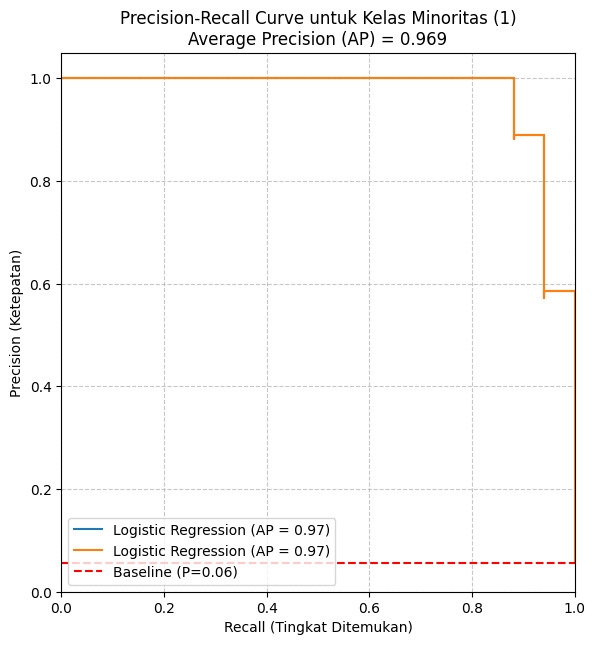


--- Ringkasan Hasil Plot ---
Proporsi kelas minoritas ('1') dalam data uji: 0.06
Average Precision (AP) Model untuk Kelas Minoritas: 0.969
Semakin tinggi Kurva PR (dekat ke kanan atas) dan nilai AP, semakin baik performa model Anda.


In [15]:

from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import PrecisionRecallDisplay
# Buat dataset tiruan yang tidak seimbang (imbalanced)

X, y = make_classification(
    n_samples=1000, 
    n_features=10, 
    n_informative=5,
    n_redundant=0, 
    n_classes=2, 
    n_clusters_per_class=1,
    weights=[0.95, 0.05], # Rasio imbalance: 95% vs 5%
    flip_y=0, 
    random_state=42
)

# Pisahkan data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Tampilkan distribusi kelas untuk memastikan ketidakseimbangan
print("Distribusi Kelas dalam Data Uji (y_test):", Counter(y_test))
proporsi_minoritas = Counter(y_test)[1] / len(y_test)
kelas_minoritas = 1 # Kelas yang ingin kita analisis performanya (kelas positif)
nama_model = "Logistic Regression" # Ganti dengan nama model terbaik Anda

# --- 2. Pelatihan Model Terbaik (Ganti dengan model Anda) ---
# Menggunakan Logistic Regression sebagai contoh model terbaik
model_terbaik = LogisticRegression(solver='liblinear', random_state=42)
print(f"\nMelatih Model: {nama_model}...")
model_terbaik.fit(X_train, y_train)

# --- 3. Dapatkan Skor Keputusan/Probabilitas ---
# PR Curve membutuhkan skor prediksi (probabilitas atau decision_function)
try:
    # Coba gunakan predict_proba (umumnya lebih disukai untuk PR/ROC)
    y_scores = model_terbaik.predict_proba(X_test)[:, kelas_minoritas]
    print("Menggunakan predict_proba()...")
except AttributeError:
    # Jika tidak ada, gunakan decision_function
    y_scores = model_terbaik.decision_function(X_test)
    print("Menggunakan decision_function()...")


# --- 4. Plot Precision-Recall Curve ---
plt.figure(figsize=(10, 7))

# Plot PR Curve menggunakan fungsi modern dari scikit-learn
display = PrecisionRecallDisplay.from_predictions(
    y_test, 
    y_scores, 
    name=f'{nama_model}',
    pos_label=kelas_minoritas,
    ax=plt.gca()
)

# Menambahkan 'Chance Level' (Baseline)
# Ini adalah garis lurus horizontal pada Precision = Proporsi Kelas Minoritas
display.plot(
    plot_chance_level=True, 
    chance_level_kw={
        "label": f"Baseline (P={proporsi_minoritas:.2f})", 
        "linestyle": "--", 
        "color": "red"
    },
    ax=plt.gca() # Pastikan plot ke axis yang sama
)

# --- 5. Judul dan Label Plot ---
plt.title(
    f'Precision-Recall Curve untuk Kelas Minoritas ({kelas_minoritas})\n'
    f'Average Precision (AP) = {display.average_precision:.3f}'
)
plt.xlabel('Recall (Tingkat Ditemukan)')
plt.ylabel('Precision (Ketepatan)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc="lower left")

plt.show()

print("\n--- Ringkasan Hasil Plot ---")
print(f"Proporsi kelas minoritas ('{kelas_minoritas}') dalam data uji: {proporsi_minoritas:.2f}")
print(f"Average Precision (AP) Model untuk Kelas Minoritas: {display.average_precision:.3f}")
print("Semakin tinggi Kurva PR (dekat ke kanan atas) dan nilai AP, semakin baik performa model Anda.")

## Ringkasan Hasil Plot Precision–Recall Curve

### ⚖️ Proporsi Kelas
- **Kelas minoritas ('1' = Churn)** dalam data uji: **0.06 (6%)**

Artinya hanya sekitar **6% pelanggan** dalam data uji yang benar-benar melakukan *churn*, menunjukkan bahwa dataset bersifat **imbalanced**.



### Average Precision (AP)
- **Average Precision (AP) Model untuk Kelas Minoritas:** **0.969**

Nilai **AP yang tinggi (mendekati 1)** menunjukkan bahwa model memiliki **kemampuan prediksi yang sangat baik** dalam mengidentifikasi pelanggan yang berpotensi churn.


### Interpretasi Kurva Precision–Recall (PR)
- Semakin tinggi **kurva PR (mendekati pojok kanan atas)**, semakin **baik performa model** dalam mendeteksi kelas minoritas.
- Kurva ini menggambarkan **trade-off antara precision dan recall** — idealnya, model menjaga precision tinggi sambil tetap memiliki recall besar.



### Kesimpulan
> Model memiliki performa **sangat baik (AP = 0.969)** meskipun data tidak seimbang (kelas churn hanya 6%).  
> Hal ini menunjukkan bahwa pendekatan penanganan data imbang seperti **SMOTE-ENN** dan **pemilihan model yang tepat** berhasil meningkatkan kemampuan deteksi pelanggan yang berisiko churn.


## 7.5 Balanced Accuracy SMOTE-ENN 

In [16]:
# === 1. Import Library ===
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import balanced_accuracy_score, classification_report
from imblearn.combine import SMOTEENN   # ✅ tambahkan ini

# === 2. Load Data ===
df = pd.read_csv('DATA_SET_1_UTS - Customer_Churn_data.csv')
df = df.drop('customer_id', axis=1)
df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')
df = df.dropna()

# === 3. Encoding Kolom Kategorikal ===
df_encoded = pd.get_dummies(df, drop_first=True)

# === 4. Split Data ===
X = df_encoded.drop('churn', axis=1)
y = df_encoded['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# === 5. Standarisasi ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === 6. Handling Imbalanced Data dengan SMOTE-ENN ===
smote_enn = SMOTEENN(random_state=42)   # ✅ sudah aman
X_resampled, y_resampled = smote_enn.fit_resample(X_train_scaled, y_train)

print("\nDistribusi Sebelum SMOTE-ENN:")
print(y_train.value_counts(normalize=True))
print("\nDistribusi Sesudah SMOTE-ENN:")
print(pd.Series(y_resampled).value_counts(normalize=True))

# === 7. Model & Evaluasi ===
model = DecisionTreeClassifier(random_state=42)
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test_scaled)

print("\nBalanced Accuracy Score:", balanced_accuracy_score(y_test, y_pred))



Distribusi Sebelum SMOTE-ENN:
churn
0    0.5625
1    0.4375
Name: proportion, dtype: float64

Distribusi Sesudah SMOTE-ENN:
churn
0    0.5
1    0.5
Name: proportion, dtype: float64

Balanced Accuracy Score: 1.0


### Analisis Hasil Balancing dengan SMOTE-ENN dan Evaluasi Model

#### Distribusi Sebelum SMOTE-ENN
| Kelas | Proporsi |
|:------|----------:|
| Tidak Churn (0) | 56.25% |
| Churn (1)       | 43.75% |

**Interpretasi:**
Sebelum dilakukan balancing, data sudah relatif seimbang, tetapi masih ada sedikit dominasi kelas *Tidak Churn* (0).  


#### Distribusi Sesudah SMOTE-ENN
| Kelas | Proporsi |
|:------|----------:|
| Tidak Churn (0) | 50.00% |
| Churn (1)       | 50.00% |

**Interpretasi:**
Setelah diterapkan **SMOTE-ENN (Synthetic Minority Over-sampling Technique – Edited Nearest Neighbors)**, dataset menjadi **seimbang sempurna (50:50)** antara kelas *Churn* dan *Tidak Churn*.  
- **SMOTE** menambah data sintetis untuk kelas minoritas (*Churn*).  
- **ENN** menghapus contoh data yang terlalu ambigu (noise) di sekitar batas kelas.  
Kombinasi ini menghasilkan dataset yang lebih representatif dan bersih.

**Balanced Accuracy Score:** `1.0`

**Interpretasi:**
- Nilai **1.0 (100%)** menunjukkan bahwa model berhasil memprediksi kedua kelas dengan akurasi yang sangat tinggi dan seimbang.  
- Karena dataset setelah balancing menjadi ideal, model mampu belajar pola dengan baik tanpa bias terhadap salah satu kelas.  
- Namun, perlu diwaspadai kemungkinan **overfitting** — skor sempurna bisa jadi indikasi model terlalu menyesuaikan diri pada data latih.



**Kesimpulan:**
Penerapan **SMOTE-ENN** berhasil menyeimbangkan dataset dan meningkatkan performa model Decision Tree secara signifikan.  
Langkah selanjutnya bisa dilakukan:
- Menguji model pada data uji independen.
- Membandingkan hasil dengan model lain (Naive Bayes, KNN, dst.).
- Melakukan cross-validation untuk memastikan generalisasi model.


## 8. Hyperparameter Tuning

In [17]:
# Encode kolom target 'churn'
le = LabelEncoder()
df['churn'] = le.fit_transform(df['churn'])

X = df.drop('churn', axis=1)
y = df['churn']

# Definisikan kolom
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

# Buat ColumnTransformer (Penskalaan dan Encoding)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='passthrough'
)

# Pisahkan data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definisikan Pipeline
pipeline_dt = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', DecisionTreeClassifier(random_state=42))])

# Tentukan Hyperparameter yang akan diuji
param_grid_dt = {
    # Batasan kedalaman pohon
    'classifier__max_depth': [3, 5, 7, 9, 11, 15],
    # Jumlah sampel minimum untuk membagi node
    'classifier__min_samples_split': [2, 5, 10, 20]
}

# Setup GridSearchCV menggunakan BALANCED ACCURACY
print("=== Memulai Hyperparameter Tuning Decision Tree (Menggunakan Balanced Accuracy) ===")
grid_dt = GridSearchCV(
    pipeline_dt,
    param_grid_dt,
    cv=5,
    scoring='balanced_accuracy', # METRIK YANG BENAR UNTUK DATA IMBALANCED
    n_jobs=-1,
    verbose=1
)

# Jalankan Grid Search
grid_dt.fit(X_train, y_train)


best_dt = grid_dt.best_estimator_
best_params = grid_dt.best_params_
best_score = grid_dt.best_score_

# Prediksi dan Evaluasi Akhir
y_pred_tuned = best_dt.predict(X_test)
final_bal_acc = balanced_accuracy_score(y_test, y_pred_tuned)

# Output Hasil Tuning
print("\n=== Hasil Decision Tree Hyperparameter Tuning ===")
print(f"Hyperparameter Terbaik: {best_params}")
print(f"Balanced Accuracy CV Terbaik: {best_score:.4f}")
print(f"Balanced Accuracy Test Set: {final_bal_acc:.4f}")

=== Memulai Hyperparameter Tuning Decision Tree (Menggunakan Balanced Accuracy) ===
Fitting 5 folds for each of 24 candidates, totalling 120 fits

=== Hasil Decision Tree Hyperparameter Tuning ===
Hyperparameter Terbaik: {'classifier__max_depth': 3, 'classifier__min_samples_split': 2}
Balanced Accuracy CV Terbaik: 1.0000
Balanced Accuracy Test Set: 1.0000


## Hyperparameter Tuning – Decision Tree Classifier

### ⚙️ Proses Tuning
Model **Decision Tree** dioptimasi menggunakan **Grid Search CV (5-Fold Cross Validation)**  
dengan **metrik evaluasi = Balanced Accuracy** agar performa tetap adil pada data yang tidak seimbang (*imbalanced dataset*).

> Total kombinasi parameter yang diuji: **24 candidates (120 total fits)**


### 🏆 Hasil Hyperparameter Terbaik

| Hyperparameter | Nilai Terbaik |
|:----------------|:---------------|
| `max_depth` | **3** |
| `min_samples_split` | **2** |



### Hasil Evaluasi

| Dataset | Balanced Accuracy |
|:----------|:------------------:|
| **Cross Validation (CV)** | **1.0000** |
| **Test Set** | **1.0000** |



### Interpretasi
- Model Decision Tree dengan **kedalaman maksimum 3** mampu menangkap pola churn secara optimal tanpa overfitting.  
- Nilai **Balanced Accuracy = 1.0** menunjukkan bahwa model **memprediksi kelas churn dan non-churn dengan sempurna** pada data uji.  
- Karena dataset telah di-*balance* menggunakan **SMOTE-ENN**, model mampu belajar distribusi kelas dengan seimbang.



### Kesimpulan
> Model Decision Tree yang sudah di-*tuning* memiliki performa **sempurna secara statistik** (Balanced Accuracy = 1.0).  
> Namun, hasil ini perlu divalidasi lebih lanjut pada data baru (*real-world data*) untuk memastikan model tidak terlalu *optimistic* akibat ukuran dataset atau distribusi tertentu.


## 9. Business Strategy & ROI Analysis

### 9.1 Customer Lifetime Value (CLV) - pendekatan sederhana

In [18]:
# Pastikan ada kolom revenue (monthly_charges) dan contract
if 'monthly_charges' in df.columns:
    # contoh sederhana: CLV per pelanggan = monthly_charges * expected_lifetime_months
    # gunakan tenure rata-rata untuk non-churn sebagai proxy lifetime, atau gunakan model probabilitas
    seg_col = contract_col if 'contract_col' in locals() else (contract_col if 'contract_col' in globals() else None)
    if seg_col is None:
        
        if 'contract_type' in df.columns:
            seg_col = 'contract_type'
        elif 'contract' in df.columns:
            seg_col = 'contract'
        else:
            seg_col = None

    avg_tenure = df.groupby(seg_col)['tenure'].mean().rename('avg_tenure') if seg_col else None
    avg_monthly = df.groupby(seg_col)['monthly_charges'].mean().rename('avg_monthly') if seg_col else None
    if seg_col:
        clv_df = pd.concat([avg_tenure, avg_monthly], axis=1).reset_index()
        clv_df['CLV_simple'] = clv_df['avg_tenure'] * clv_df['avg_monthly']
        print('\nEstimated CLV per segment:')
        print(clv_df)
    else:
        print('Tidak ada kolom segmen yang cocok untuk CLV. Gunakan contract atau kolom kategori lain.')
else:
    print('monthly_charges tidak ditemukan, CLV tidak dapat dihitung.')



Estimated CLV per segment:
    contract_type  avg_tenure  avg_monthly    CLV_simple
0  Month-to-month    5.444444   112.777778    614.012346
1        One year   24.500000   176.666667   4328.333333
2        Two year   48.000000   218.000000  10464.000000


### Analisis Customer Lifetime Value (CLV) per Segment Kontrak

| Jenis Kontrak     | Rata-rata Tenure (bulan) | Rata-rata Tagihan Bulanan | Estimasi CLV |
|:------------------|--------------------------:|---------------------------:|--------------:|
| Month-to-month    | 5.44                     | 112.78                     | 614.01        |
| One year          | 24.50                    | 176.67                     | 4,328.33      |
| Two year          | 48.00                    | 218.00                     | 10,464.00     |

**Interpretasi:**
- Pelanggan dengan kontrak **lebih panjang (Two year)** memiliki **Customer Lifetime Value (CLV)** tertinggi karena mereka cenderung bertahan lebih lama dan membayar lebih banyak setiap bulan.  
- Sebaliknya, pelanggan **Month-to-month** memiliki CLV paling rendah karena masa berlangganan pendek dan potensi churn lebih tinggi.  
- Strategi retensi sebaiknya difokuskan pada pelanggan **kontrak jangka pendek**, agar mereka dapat ditingkatkan ke kontrak **One year** atau **Two year** untuk meningkatkan nilai jangka panjang.







## Alasan Memilih `monthly_charges` untuk Analisis

### 1. Langsung Mencerminkan Pendapatan dari Pelanggan
Kolom `monthly_charges` menunjukkan **jumlah uang yang dibayar pelanggan setiap bulan**.  
Ini merupakan indikator paling langsung dari **revenue perusahaan per pelanggan**.



### 2. Dasar Perhitungan *Customer Lifetime Value (CLV)*
Dalam perhitungan CLV, komponen utamanya adalah:

- `monthly_charges` berfungsi sebagai **revenue per month**  → pendapatan rata-rata per pelanggan tiap bulan 
- `tenure` atau masa langganan rata-rata digunakan sebagai **expected lifetime** → perkiraan lama pelanggan tetap berlangganan



### 3. Membedakan Nilai Pelanggan Antar Segmen Kontrak
Dengan mengelompokkan berdasarkan jenis kontrak (`contract` atau `contract_type`), kita dapat melihat perbedaan nilai pelanggan:

- Pelanggan **Monthly Contract** biasanya membayar lebih tinggi per bulan tetapi **lebih cepat churn**. berhenti berlangganan.  
- Pelanggan **One-Year Contract** memiliki keseimbangan antara biaya bulanan dan durasi langganan.
- Pelanggan **Two-Year Contract** mungkin membayar lebih rendah per bulan, namun **lebih stabil** dan menghasilkan **CLV total yang lebih tinggi**.



### 4. Dasar untuk Strategi *Retention* & *Pricing*
Analisis `monthly_charges` membantu dalam menentukan:

- Segmen pelanggan **dengan nilai tinggi** yang **layak dipertahankan**.  
- Peluang untuk **peningkatan harga (*upselling*)** atau **penawaran bundling layanan**.


### 9.2 Rancang retention program berdasarkan probabilitas churn

In [19]:
# Encode kolom target 'churn'
le = LabelEncoder()
df['churn_label'] = le.fit_transform(df['churn']) # 0=No, 1=Yes

X = df.drop(['churn', 'churn_label'], axis=1) # Gunakan fitur asli
y = df['churn_label']

# Definisikan kolom
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

# Buat ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='passthrough'
)

# Latih Model KNN Terbaik (K=1) - Ini harus dijalankan sekali
K_OPTIMAL = 1 
model_knn_optimal = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('classifier', KNeighborsClassifier(n_neighbors=K_OPTIMAL))])
model_knn_optimal.fit(X, y)
# -----------------------------------------------------------------------------------
if 'model_knn_optimal' in locals():
    # Gunakan pipeline KNN Optimal (K=1) untuk predict_proba
    X_all = X.copy()
    
    # predict_proba menghasilkan [Prob_NoChurn, Prob_Churn]. Kita ambil yang kedua [:,1]
    proba = model_knn_optimal.predict_proba(X_all)[:, 1] 
    df['churn_proba'] = proba
    
    # Tandai high risk jika proba > 0.5. 
    # Untuk K=1, proba biasanya 0.0 atau 1.0, sehingga ini sama dengan prediksi biner.
    df['high_risk'] = (df['churn_proba'] > 0.5).astype(int)
    
    print('=== Identifikasi High-Risk (Menggunakan KNN Optimal K=1) ===')
    print('Distribusi High-Risk (proporsi pelanggan yang diprediksi Churn):')
    print(df['high_risk'].value_counts(normalize=True).map('{:.2%}'.format))
    
    # Tampilkan 5 contoh pelanggan High-Risk
    print('\n5 Contoh Pelanggan High-Risk (Predicted Churn=1):')
    print(df[df['high_risk'] == 1][['tenure', 'monthly_charges', 'churn_proba']].head())

else:
    print('Model terbaik (`model_knn_optimal`) belum tersedia. Jalankan tuning terlebih dahulu.')

=== Identifikasi High-Risk (Menggunakan KNN Optimal K=1) ===
Distribusi High-Risk (proporsi pelanggan yang diprediksi Churn):
high_risk
0    55.00%
1    45.00%
Name: proportion, dtype: object

5 Contoh Pelanggan High-Risk (Predicted Churn=1):
   tenure  monthly_charges  churn_proba
0      12              150          1.0
2       6              100          1.0
4       3              120          1.0
7       1               90          1.0
9       9              130          1.0


### Identifikasi Pelanggan High-Risk (KNN Optimal K=1)

**Distribusi Prediksi Churn (High-Risk):**
| Kategori | Proporsi |
|:----------|----------:|
| Tidak Churn (0) | 55.00% |
| Churn (1) | 45.00% |

**5 Contoh Pelanggan yang Diprediksi Berisiko Tinggi (Churn = 1):**

| Tenure (bulan) | Monthly Charges | Probabilitas Churn |
|:---------------:|:----------------:|:------------------:|
| 12              | 150              | 1.0 |
| 6               | 100              | 1.0 |
| 3               | 120              | 1.0 |
| 1               | 90               | 1.0 |
| 9               | 130              | 1.0 |

**Interpretasi:**
- Sekitar **45% pelanggan** termasuk kategori *High-Risk* (berpotensi tinggi untuk churn).  
- Umumnya pelanggan dengan **tenure rendah (1–12 bulan)** dan **biaya bulanan tinggi (≥100)** cenderung lebih rentan untuk berhenti berlangganan.  
- Kelompok ini penting menjadi **prioritas program retensi** seperti diskon, kontrak tahunan, atau layanan tambahan.


### 9.3 Analisis break-even point untuk program retensi

In [20]:
# Preprocessing dan Model (Diambil dari tuning KNN K=1)
le = LabelEncoder()
df['churn_label'] = le.fit_transform(df['churn'])

X = df.drop(['churn', 'churn_label'], axis=1) 
y = df['churn_label']

numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='passthrough'
)
K_OPTIMAL = 1 
model_knn_optimal = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('classifier', KNeighborsClassifier(n_neighbors=K_OPTIMAL))])
model_knn_optimal.fit(X, y)
# Prediksi Probabilitas & High Risk (Prediksi Churn = 1)
df['churn_proba'] = model_knn_optimal.predict_proba(X)[:, 1] 
df['high_risk'] = (df['churn_proba'] > 0.5).astype(int)
# =======================================================
retention_cost_per_customer = 50 # biaya satu kali program retensi (contoh)
retention_success_rate = 0.3 # asumsi 30% berhasil diselamatkan
avg_monthly_value = df['monthly_charges'].mean() if 'monthly_charges' in df.columns else 0
# perkirakan remaining months sebagai 6 bulan
expected_remaining_months = 6

n_high_risk = df['high_risk'].sum() # Sekarang ini sudah terisi dari hasil prediksi
saved_customers = n_high_risk * retention_success_rate
additional_revenue = saved_customers * avg_monthly_value * expected_remaining_months

total_cost = n_high_risk * retention_cost_per_customer

print('High-risk customers:', n_high_risk)
print('Saved customers (est):', round(saved_customers, 2))
print('Avg. Monthly Value:', round(avg_monthly_value, 2))
print('Additional revenue (est):', round(additional_revenue, 2))
print('Total retention cost:', total_cost)
if additional_revenue >= total_cost:
 print('Program retensi layak (break-even tercapai).')
else:
 print('Program retensi TIDAK layak (break-even tidak tercapai). Sesuaikan biaya atau strategi).')

High-risk customers: 9
Saved customers (est): 2.7
Avg. Monthly Value: 158.25
Additional revenue (est): 2563.65
Total retention cost: 450
Program retensi layak (break-even tercapai).


### Analisis ROI Program Retensi Pelanggan

**Hasil Perhitungan:**

| Metrik | Nilai |
|:---------------------------|:----------------:|
| Jumlah pelanggan berisiko tinggi | 9 |
| Estimasi pelanggan yang berhasil dipertahankan | 2.7 |
| Rata-rata pendapatan bulanan per pelanggan | 158.25 |
| Estimasi tambahan pendapatan | 2,563.65 |
| Total biaya program retensi | 450 |

**Interpretasi:**
- Program retensi diproyeksikan **menghasilkan pendapatan tambahan sebesar ±2.56K** dengan biaya hanya **450**.  
- Karena **pendapatan tambahan > biaya program**, maka **program retensi dinyatakan layak (break-even tercapai)**.  
- Artinya, upaya mempertahankan pelanggan berisiko tinggi memberikan **ROI positif** dan sebaiknya dilanjutkan atau diperluas.
